Predicting whether a mushroom is poisonous given other attributes

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
# Loading in the data
mushrooms = pd.read_csv("mushrooms(1).csv")
print(mushrooms)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [ ]:
# Encoding categorical variables
X = pd.get_dummies(mushrooms.drop('class', axis=1), drop_first=True)
print(X)
# Extraing target variable
y = mushrooms['class']

      cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0           False        False        False        False         True   
1           False        False        False        False         True   
2           False        False        False        False        False   
3           False        False        False        False         True   
4           False        False        False        False         True   
...           ...          ...          ...          ...          ...   
8119        False        False         True        False        False   
8120        False        False        False        False         True   
8121        False         True        False        False        False   
8122        False        False         True        False        False   
8123        False        False        False        False         True   

      cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  \
0             False           True          

[[1047    5]
 [   1  978]]


<Figure size 800x600 with 0 Axes>

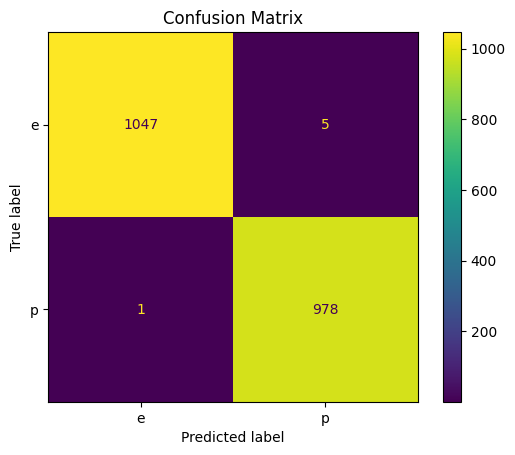

In [ ]:
# Splitting the data into training and testing sets (using random_state = 2024, training partition = 0.75, stratify = y,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)

# Building a classification tree model (using random_state = 2024, max_depth = 6)
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=2024)
tree_clf.fit(X_train, y_train)

# Predicting classes for train and test sets
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tree_clf.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(values_format='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Accuracy on the training partition
train_accuracy = accuracy_score(y_train, y_train_pred)
print("The accuracy on the training partition was:", train_accuracy)

# Accuracy on the test partition
test_accuracy = accuracy_score(y_test, y_test_pred)
print("The accuracy on the test partition was:", test_accuracy)

The accuracy on the training partition was: 0.9965534219596258
The accuracy on the test partition was: 0.9970457902511078


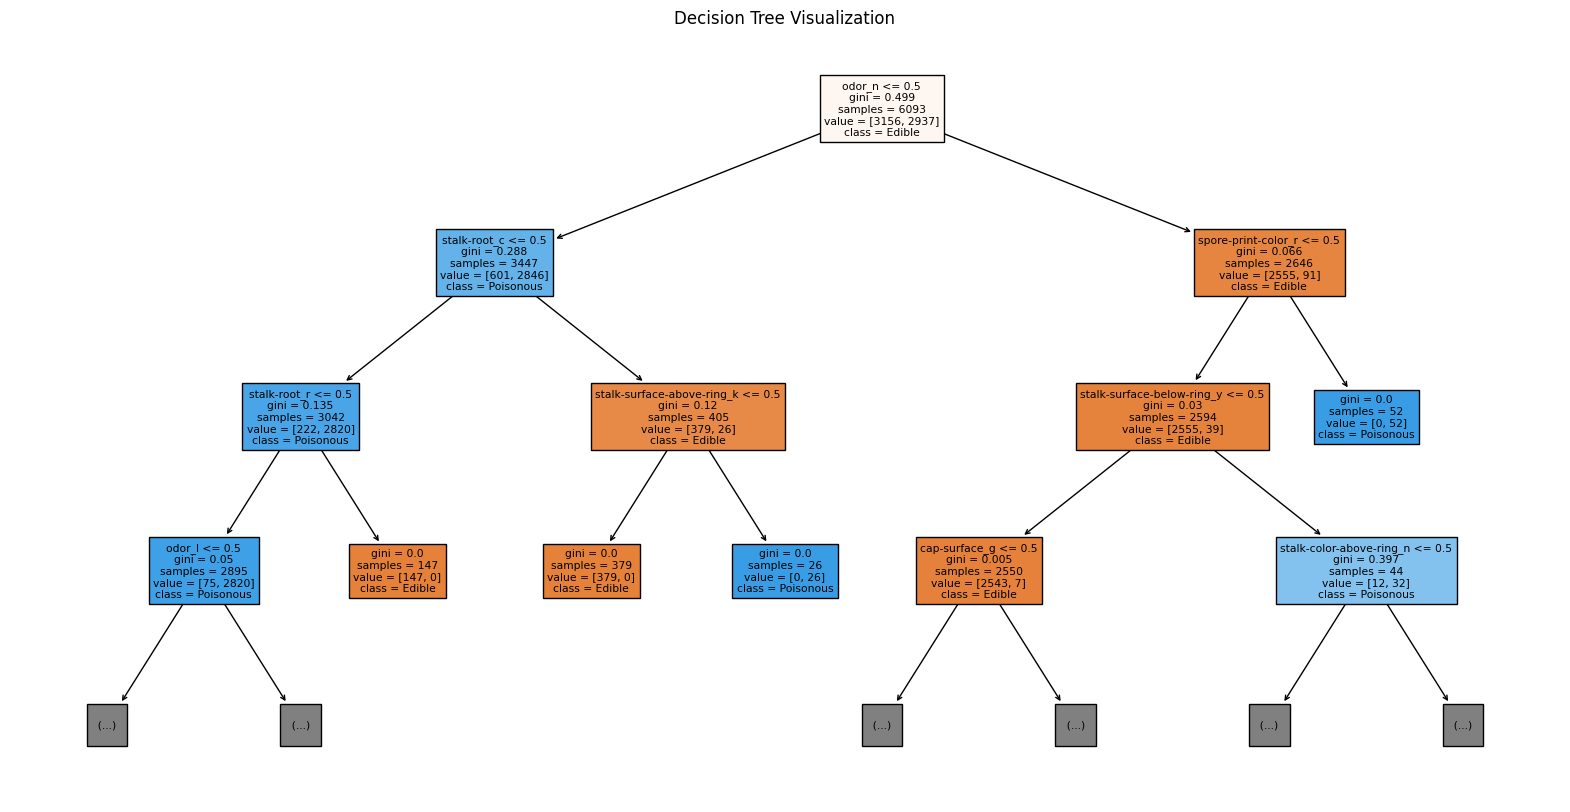

In [ ]:
# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Edible', 'Poisonous'], max_depth=3)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
# Extracting the feature importance and corresponding feature names
feature_importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
# Sorting the features based on importance
top_features = feature_importances.nlargest(3).index
# Printing the most imporant features
print('The three most important features for determining toxicity are:')
for feature in top_features:
    print(feature)

The three most important features for determining toxicity are:
odor_n
stalk-root_c
stalk-root_r


In [ ]:
# Mushroom features
mushroom_features = {
    'cap-shape': 'x',
    'cap-surface': 's',
    'cap-color': 'n',
    'bruises': 't',
    'odor': 'y',
    'gill-attachment': 'f',
    'gill-spacing': 'c',
    'gill-size': 'n',
    'gill-color': 'k',
    'stalk-shape': 'e',
    'stalk-root': 'e',
    'stalk-surface-above-ring': 's',
    'stalk-surface-below-ring': 's',
    'stalk-color-above-ring': 'w',
    'stalk-color-below-ring': 'w',
    'veil-type': 'p',
    'veil-color': 'w',
    'ring-number': 'o',
    'ring-type': 'p',
    'spore-print-color': 'r',
    'population': 's',
    'habitat': 'u'
}

# Creating dataframe with data of mushroom
mushroom_to_classify_df = pd.DataFrame([mushroom_features])
print(mushroom_to_classify_df)

# Ensuring the new mushroom dataframe has all the same columns as the training data, fill missing with False
mushroom_to_classify_df = mushroom_to_classify_df.reindex(columns=X_train.columns, fill_value=False)
print(mushroom_to_classify_df)

# Predicitng class for new mushroom data
predicted_class = tree_clf.predict(mushroom_to_classify_df)
# Printing predicted class
print(f'The mushroom is predicted to be: {"edible" if predicted_class[0] == "e" else "poisonous"}')

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    y               f            c   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 r          s       u  

[1 rows x 22 columns]
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False        False   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False          False          False        False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False         False     